#ATSC 405 Day 22 Assignment
## Bryan Jansens

--------

## Plot the Kohler curve for the aerosol in Phil's Kohler notes, eq. (6) and (7).
The Kohler curve comes from eq. (4.15) in Thompkins.

In [129]:
#Constants

from a405thermo.constants import constants as c

temp = 273.15 + 15    #K   using a temperature of 15 degrees C
print('Temperature is {} K.'.format(temp))
sigma = 0.0756      #N m-1 (surface tension)
a = (2*sigma)/(c.rhol*c.Rv*temp)  #from p. 3 in Phil's Kohler notes
print('Curvature term: a = {}'.format(a))

vantHoff_factor = 3.     #dimensionless
aerosol_mass = 1e-19    #kg   (from p. 2 in Phil's notes)
Mw = 0.018*1000          #kg/kmol  (from p. 2 in Phil's notes)
Ms = 0.132*1000          #kg/kmol   (from p. 2 in Phil's notes)
b = (vantHoff_factor*aerosol_mass*Mw)/((4./3.)*np.pi*c.rhol*Ms)      #from p. 3 in Phil's Kohler notes
print('Solution term: b = {}'.format(b))

Temperature is 288.15 K.
Curvature term: a = 1.1370026107068876e-09
Solution term: b = 9.766326053366304e-24


In [115]:
#Get a vector of r values from 0.04 um to 0.30 um

rvals = np.linspace(0.04e-6,0.30e-6)

In [156]:
#Define Kohler curve using eq. (4.15) in Thompkins, adjusted for the fact that my T is included in a

def find_Kohler(r):
    curve = (1 - (b/r**3))*np.exp(a/r)
    return curve

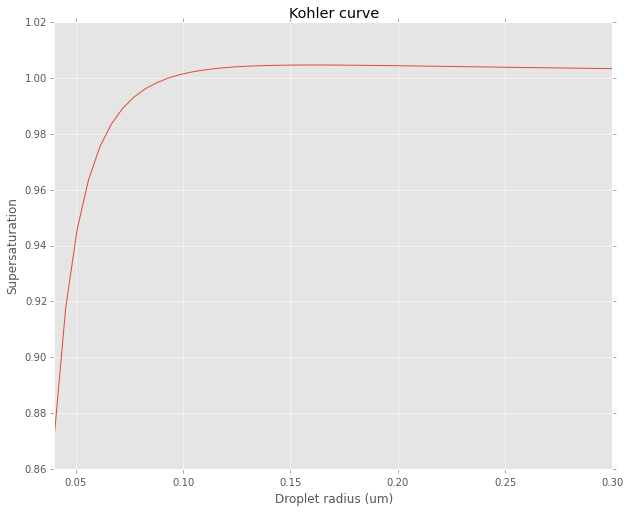

In [171]:
#Plot the Kohler curve

%matplotlib inline
plt.style.use('ggplot')

curve_data = find_Kohler(rvals)

fig,ax = plt.subplots(1,1,figsize=(10,8))
out = ax.plot(rvals*1e6, curve_data)
out = ax.set(xlabel = "Droplet radius (um)", ylabel = "Supersaturation", title = "Kohler curve")
out = ax.set(xlim = [0.04,0.30])

##Use fzero to find the equilibrium radius for a haze particle at a relative humidity of 90% and a temperature of 15 deg. C.

In [173]:
import a405thermo.rootfinder as rf
from importlib import reload
reload(rf)

<module 'a405thermo.rootfinder' from 'C:\\users\\Bryan\\repos\\A405\\a405thermo\\rootfinder.py'>

In [168]:
#Set the target values

curve_target = 0.90     #target relative humidity
r_guess = 0.05e-6       #microns    guess of r from plot of Kohler curve above

In [160]:
#function that finds where the diff. between target value and actual value is zero

def find_curve_zero(r, curve_target):
    curve_zero = curve_target - find_Kohler(r)
    return curve_zero

In [184]:
brackets = rf.find_interval(find_curve_zero, r_guess, curve_target)
target_r = rf.fzero(find_curve_zero, brackets, curve_target)
print('The equilibrium radius is {:.3} microns.'.format(target_r*1e6))

The equilibrium radius is 0.0429 microns.
